## **Risk Assessment in Hospitality Bussiness**

# **BUSINESS PROBLEM**

**Abstract:**
The hospitality business is a multibillion-dollar industry focussed on availability of leisurely needs, disposable income and complete customer satisfaction besides other facilities. Customer satisfaction and loyalty is a pivotal element in determining their performance and business growth. With the availability of various platforms for customers to express their views,the feedback and judgements are easily available. On gathering insights from the opinions shared can mitigate the severity of risk involved and deliver last mile alertness to the decision maker in transforming the business process.

**Objective:**
The objective is to analyze the text based comments made by the users in various platforms and bulid ML driven classification model to understand the sentiments of customer (satisfied or not) encompassing the users view to deliver a last mile alertness to the decision maker.

**DATA OVERVIEW:**

The dataset consisted of
*   Text based comments
*   The associated binary labels (represting satisified and unsatisfied)




### **IMPORTING LIBRARIES**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **IMPORTING THE DATA**

In [ ]:
 df = pd.read_csv('/content/Risk Assessment.tsv', delimiter = '\t')

In [ ]:
#displaying the first five rows of the dataframe 
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### **CHECKING THE DATA TYPES**

In [ ]:
df.dtypes

Review    object
Liked      int64
dtype: object

**Features:** 
1.   Text: Review 

**Target Variable:** 
1.   Categorical: Liked     

## **CHECKING FOR CLASS IMBALANCE** 

If there exists class imbalance, number of instances in each class should be balanced. 

In [ ]:
unique = df['Liked'].value_counts()

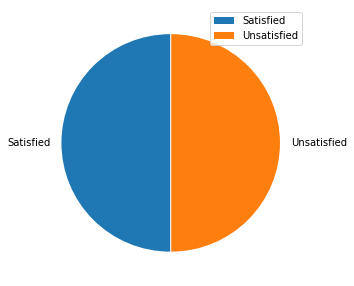

In [ ]:
plt.figure(figsize=(5, 5))
lab = ['Satisfied','Unsatisfied']
myexplode = [0.01, 0]
plt.pie(unique,labels = lab, explode = myexplode,startangle=90)
plt.legend()
plt.show()

The number of observations (both positive and negative comments) were found to be equal. 

### **Feature Engineering**

**Re (regex) library:** A Regular Expression (RegEx) is a sequence of characters that defines a search pattern.

**Natural Language Processing Tool kit (nltk):** A library for building Python programs to work with human language data, text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning

In [ ]:
import re         #regular expression 
import nltk       #natural language tool kit

In [ ]:
#downloads stopwords from nltk library  
from nltk.corpus import stopwords 
nltk.download("stopwords")    

#importing porter stemmer module for stemming 
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 

1.    **Importing Stopwords from NLTK Corpus**:
*   Downloads Stop Words NLTK corpus package
(Corpus package provide functions that can be used to read corpus files.) 

    A corpus can be defined as a collection of text documents

*   Stop Words are commonly used words (such as “the”, “a”, “an”, “in” etc..).
*   We don't want these words to take up space in our database, or taking up valuable processing time. NLTK Toolkit in python has a list of stopwords stored in 16 different languages. We remove them easily by storing a list of words of the considered language.


2.   **Importing Porter Stemmer Module**:  The porter stemmer module removes common morphological and inflexional endings from words in English. Mainly used when setting up Information Retrieval systems.

In [ ]:
#declared empty list to collect all the pre-processed text  
corpus=[] 

for i in range(0,1000):

  #retaining all the none characters by space 
  review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
  
  #converting to lower case and splitting
  review = review.lower()

  #splits strings into an array of substrings
  review = review.split()
  #creating the object of the porterstemmer class
  ps=PorterStemmer()

  #collecting all english stopwords
  all_stopwords=stopwords.words('english') 

  #remove stopword "not" from the ennglish stopwords
  all_stopwords.remove('not') 

  #tokenizing and stemming words to the root words
  review=[ps.stem(word) for word in review if not word in set(all_stopwords)]

  #list of words is converted into sentence using join function 
  review=' '.join(review)
  corpus.append(review)
  

*   **Initializing Corpus Array**: An empty Corpus array is initialized, to store large and structured set of machine-readable texts that is generated after text pre-processing techniques.

*   Created a for loop to pass all the text contained in the dataset to undergo a series of text-mining 

*   **re.sub():** The re.sub() function is used to replace occurrences of a none characters with white space. 
*   **lower():** Convert all the alphabets to lower case letters.
*   **Split():** Split the text based sentences into array of substrings. 
*   **Porter stemmer class():** Created the object solely for the purpose of tokenizing and stemming.

*   **Stopwords:**: All the stopwords of english language is stored under a variable (`all_stopwords`) except the word 'not' being removed.  

*   **Tokenization:** essentially splits up a sentence or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens. These tokens are considered as a first step for stemming, which at a later stages in the process act as a vector representing the document.

    Ex: Natural language processing (NLP) is a field of computer science

  `[‘Natural’, ‘language’, ‘processing’, ‘(‘, ‘NLP’, ‘)’, ‘is’, ‘a’, ‘field’, ‘of’, ‘computer’, ‘science’]`

*   **Stemming:** Stemming is the process of producing morphological variants of a root/base word. A stemming algorithm reduces the words to the root word thereby reducing the redundancy and processing time. 

  Ex: The steeming process for the root word 'play' includes derived words
              ['playing', 'played', 'plays'] 
              
    The derived words are replaced by root. In our example, the word "playing", "played" or "plays" is replaced by the word play.

The text pre-processed output is finally appended in corpus array initialized earlier.


### **Creating Bag of Words Model** 

In [ ]:
#importing Countvectorizer module
from sklearn.feature_extraction.text import CountVectorizer

# creating the count vectorizer model to build a matrix of terms/token counts 
cv = CountVectorizer(max_features=1500)      

# feeding the corpus data to the count vectorizer model
x = cv.fit_transform(corpus).toarray()

* **Bag of Words Model:** 

    It is method of feature extraction from the text-preprocessed data. Describes the occurences of the words within a document, disregarding the word order and grammatical details.

* **Count Vectorizer**:

    The count vectorizer tool is helpful in transforming a given text into a vector on the basis of the frequency of each word that occurs in the entire text. 

    CountVectorizer creates a matrix in which 
* Each unique word is represented by a column of the matrix.
* Each text sample from the document is a row in the matrix. 
* The value of each cell indicates count of the word in that particular text sample.

Ex:                                                          
```
com_1:The selection on the menu was great and so were the prices.    
com_2: Great food and service, huge portions and they give a military discount.                                            
com_3: .......................
com_4: .......................
.
.
.
com_n:........................
```
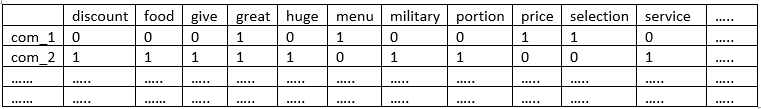

Inside CountVectorizer, the words are not stored as strings. Rather, they are given a particular index value. In our case 'discount' would have index 0, 'food' would have index 1, 'give' would have index 2 and so on. The actual representation looks like this 

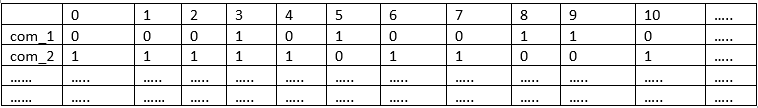

This way of representation is known as a Sparse Matrix.

The encoded document after trasforming it to an array would look like 

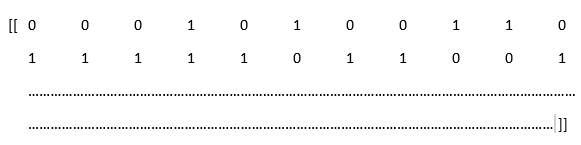


### Seperating the Target Variable

In [ ]:
#setting the target column to the variable 
y=df.iloc[:,-1].values

In [ ]:
#dimensions of the input feature
print(x.shape)

(1000, 1500)


### **Split the pre-processed data into training and test sets**

In [ ]:
#importing the train_test_split module
from sklearn.model_selection import train_test_split

#Splitting arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### **Function to evaluate performance of the various ML Model**

In [ ]:
#defining function to evaluate the classifier's performance 
def classifier_results(x_train, y_train, x_test, y_test, y_pred): 
  from sklearn.metrics import accuracy_score,plot_confusion_matrix  #importing confusion_matrix plot from sklearn 
  from sklearn.metrics import confusion_matrix                      #importing confusion matrix 
  matrix = confusion_matrix(y_test,y_pred)                          
  True_Positive = matrix[0][0]                                      #Assigning true_positive from confusion_matrix
  True_Negative = matrix[1][1]                                      #Assigning true_negative from confusion_matrix  
  False_Positive = matrix[0][1]                                     #Assigning false_positive from confusion_matrix
  False_Negative = matrix[1][0]                                     #Assigning true_positive from confusion_matrix


  #calculating Accuracy from confusion matrix
  Accuracy = (True_Positive + True_Negative)/(True_Positive + True_Negative + False_Positive + False_Negative)
  Precison = True_Positive / (True_Positive + False_Positive)  #calculating Precision from confusion matrix 
  Recall = True_Positive / (True_Positive + False_Negative)    #calculating Recall from confusion matrix 
  F1score = (2*Precison*Recall)/(Precison+Recall)              #calculating F1 score from confusion matrix 


  print ("****** Model successfully tested ******")
  print ("******* Model Statistics ******")
  print("Training Accuracy :", classifier.score(x_train, y_train))
  print("Testing Accuracy :", classifier.score(x_test, y_test))
  print ("Accuracy of Model = ",Accuracy)
  print ("Precison of Model = ",Precison)
  print ("Recall of Model   = ",Recall)
  print ("F1score of Model  = ",F1score)
  print ("****************************")

  plot_confusion_matrix(X=x_test,y_true=y_test,estimator=classifier)

**MULTINOMIAL NAIVE BAYES ALGORITHM**

* Multinomial Naive Bayes is a probabilistic algorithm based on Bayes theorem.

* Bayes theorem calculates probability P(c|x) 

    * where c is the class of the possible outcomes (i.e. in our case whether satisfied and unsatisfied)

    * x is the given instance which has to be classified, representing certain features. (i.e. in our case indexed words of a particular sample)  
    
```
    P(c|x) = P(x|c) * P(c) / P(x)

        P(c|x) - is the posterior probability of class c given predicors (features). 

        p(c) - prior probability of class

        p(x|c) - is the likelihood which is the probability of the predictor given class 

        p(x) - is the earlier probability of the predictor (features)

```
* Naive Bayes predicts the tag of a text. They calculate the probability of each tag for a given text and then output the tag with the highest one. 

In [ ]:
## importing Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)    # Fitting Multinomial Naive Bayes to the Training set

# predicting the test set results
y_pred=classifier.predict(x_test)

****** Model successfully tested ******
******* Model Statistics ******
Training Accuracy : 0.944
Testing Accuracy : 0.768
Accuracy of Model =  0.768
Precison of Model =  0.7692307692307693
Recall of Model   =  0.743801652892562
F1score of Model  =  0.7563025210084033
****************************


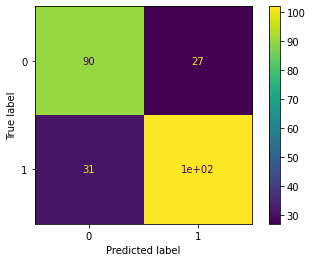

In [ ]:
#classifier performance on test set
classifier_results(x_train, y_train, x_test, y_test, y_pred) 

**RANDOM FOREST CLASSIFIER ALGORITHM**


* Random forest comes in a category of ensemble models which is popularly known as **bagging**. 

    - The random forest takes advantage by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is called Bagging.

    - *`Note:  In bagging we are not subsetting the training data into smaller chunks and training each tree on a different chunk`*.


* Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

The random forest algorithm can be represented mathematically as:

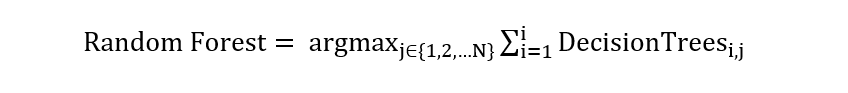


```
where
class j - refers to the classes in the data and
i - refers to the number of decision trees from 1 up to the ith example.
Argmax -  refers to the maximum value of the function, in other words, the majority voting.
```



In [ ]:
## importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

****** Model successfully tested ******
******* Model Statistics ******
Training Accuracy : 0.996
Testing Accuracy : 0.716
Accuracy of Model =  0.716
Precison of Model =  0.8974358974358975
Recall of Model   =  0.6402439024390244
F1score of Model  =  0.7473309608540926
****************************


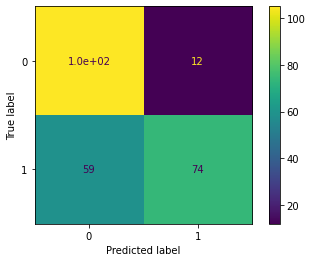

In [ ]:
#classifier performance on test set
classifier_results(x_train, y_train, x_test, y_test, y_pred)

**SUPPORT VECTOR CLASSIFIER ALGORITHM**

*   The objective here is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.
*   To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes.
*  Hyperplanes are decision boundaries that help classify the data points since our input features is 2 the hyperplane is just a line. 

* We maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.

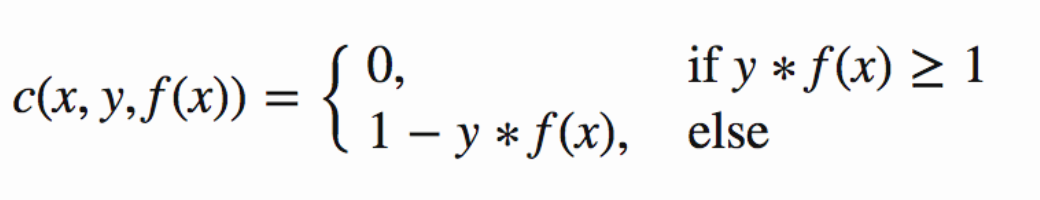

* The cost is 0 if the predicted value and the actual value are of the same sign. If they are not, we then calculate the loss value. We add a regularization parameter to the cost function. The objective of the regularization parameter is to balance the margin maximization and loss. 

* The Regularization parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 

    For large values - will choose a smaller-margin hyperplane

    For smaller values - will cause the optimizer to look for a larger-margin separating hyperplane


In [ ]:
#importing support vector classifier 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC()
classifier.fit(x_train, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

****** Model successfully tested ******
******* Model Statistics ******
Training Accuracy : 0.972
Testing Accuracy : 0.76
Accuracy of Model =  0.76
Precison of Model =  0.9230769230769231
Recall of Model   =  0.6792452830188679
F1score of Model  =  0.7826086956521738
****************************


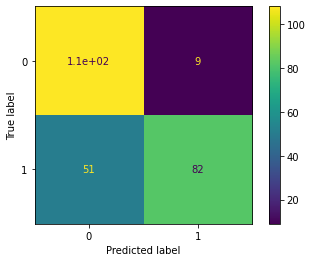

In [ ]:
#classifier performance on test set
classifier_results(x_train,y_train,x_test,y_test,y_pred)

**K-NEAREST NEIGHBOR CLASSIFIER ALGORITHM**

* K-Nearest Neighbors being Instance based Learning and Non-Parametric Algorithm uses "feature similarity" technique to make classification. 

* In the case of our data KNN Algorithm classifies a new text sample to a category with highest frequency from the K-most similar instances (votes). 

* Each instance in the essence votes for their class and the class with most votes is taken as prediction. 

* Before we classify a test point we

    * Need to initialize the value of K 

    * To determine which of the K-instances in the training data set is nearer to test point we use distance metrics to calculate the distance. 




In [ ]:
## importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

****** Model successfully tested ******
******* Model Statistics ******
Training Accuracy : 0.8173333333333334
Testing Accuracy : 0.684
Accuracy of Model =  0.684
Precison of Model =  0.811965811965812
Recall of Model   =  0.625
F1score of Model  =  0.7063197026022304
****************************


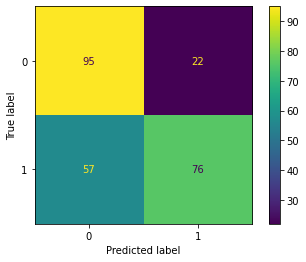

In [ ]:
#classifier performance on test set
classifier_results(x_train,y_train,x_test,y_test,y_pred)

Since the dataset containes roughly equal number of samples in each class. The **accuracy metric** of the classification report could be used for deciding the right model. 


*   Accuracy of Model :  Accuracy is the ratio of the total number of correct predictions and the total number of predictions, tells Overall how often is the classifier correct? 
*   Precision of Model : Precision is the ratio between the True Positives and all the Positives, tells a how well the positive value is correctly predicted, how often is the prediction correct?
*   Recall of Model : The recall is the measure of our model correctly identifying True Positives, tells the actual value is positive, how often is the prediction correct?
*   F1 score of Model : F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and if there is an uneven class distribution (large number of Actual Negatives).

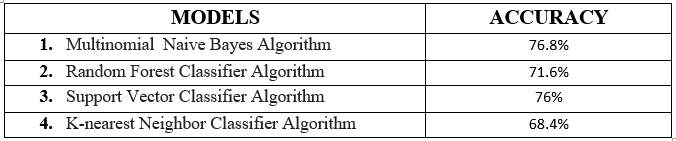

**Therefore Multinomial Naive Bayes Algorithm and Support Vector Classifer was better at predicting the sentiments of customer and would perform better in delivering the last mile alertness upon reaching a certain threshold levels.** 


